In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# descriptive anlysis and basic EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
# cehcking for null values
df.isna().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [5]:
# checking for duplicated values
df[df.duplicated]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [6]:
df.shape

(600, 6)

In [7]:
df.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [8]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [9]:
df['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

<Axes: xlabel='Marital.Status', ylabel='count'>

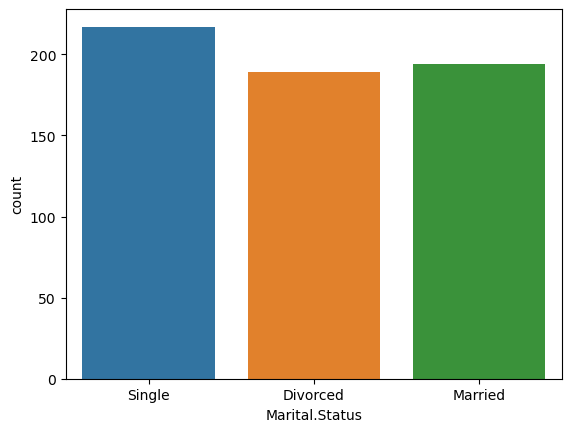

In [10]:
sns.countplot(df,x='Marital.Status')

<Axes: xlabel='Undergrad', ylabel='count'>

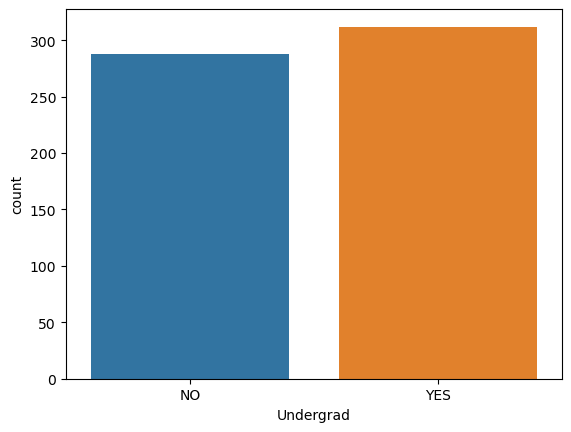

In [11]:
sns.countplot(df,x='Undergrad')

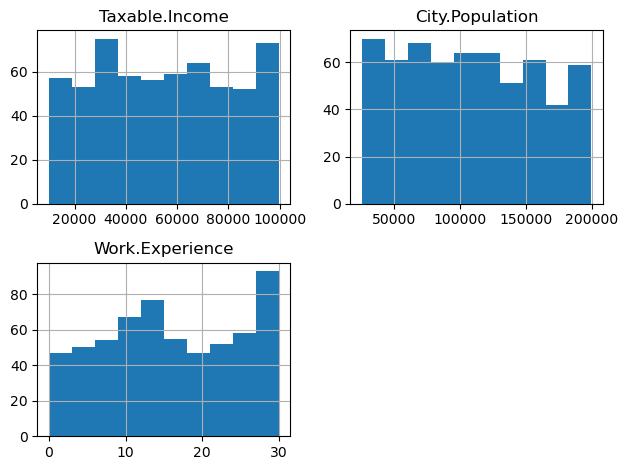

In [12]:
df.hist()
plt.tight_layout()

C:\Users\bivin\AppData\Local\Temp\ipykernel_11156\3169646405.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

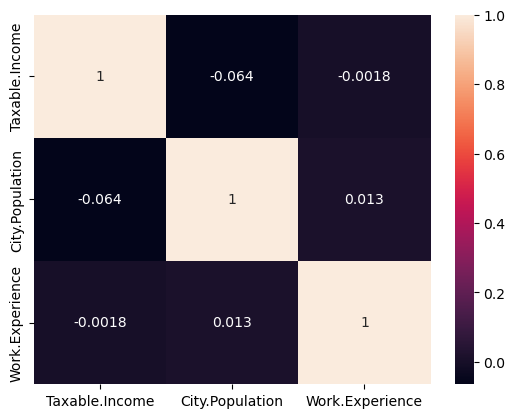

In [13]:
# correlation analysis
sns.heatmap(df.corr(),annot=True)

In [14]:
taxable=[]

for v in df['Taxable.Income']:
    if v<=30000:
        taxable.append('risky')
    else:
        taxable.append('good')

In [15]:
df['taxable']=taxable

In [16]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [17]:
fraud=df.drop(['Taxable.Income','City.Population'],axis=1)
fraud

,Undergrad,Marital.Status,Work.Experience,Urban,taxable
0,NO,Single,10,YES,good
1,YES,Divorced,18,YES,good
2,NO,Married,30,YES,good
3,YES,Single,15,YES,good
4,NO,Married,28,NO,good
...,...,...,...,...,...
595,YES,Divorced,7,YES,good
596,YES,Divorced,2,YES,good
597,NO,Divorced,0,YES,good
598,YES,Married,17,NO,good


In [18]:
# feature scaling
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
fraud['Undergrad']=le.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=le.fit_transform(fraud['Marital.Status'])
fraud['Urban']=le.fit_transform(fraud['Urban'])

In [21]:
fraud

,Undergrad,Marital.Status,Work.Experience,Urban,taxable
0,0,2,10,1,good
1,1,0,18,1,good
2,0,1,30,1,good
3,1,2,15,1,good
4,0,1,28,0,good
...,...,...,...,...,...
595,1,0,7,1,good
596,1,0,2,1,good
597,0,0,0,1,good
598,1,1,17,0,good


In [24]:
x=fraud.iloc[:,:-1]
y=fraud[['taxable']]

In [25]:
# train test split
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=45)

In [27]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(420, 4)
(180, 4)
(420, 1)
(180, 1)


## decision tree model building using entropy criteria

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [30]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [31]:
ypred=model.predict(xtest)

In [33]:
from sklearn.metrics import classification_report

In [34]:
# getting accuracy
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        good       0.82      0.99      0.90       148
       risky       0.00      0.00      0.00        32

    accuracy                           0.82       180
   macro avg       0.41      0.50      0.45       180
weighted avg       0.68      0.82      0.74       180



In [35]:
x.columns

Index(['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban'], dtype='object')

[]

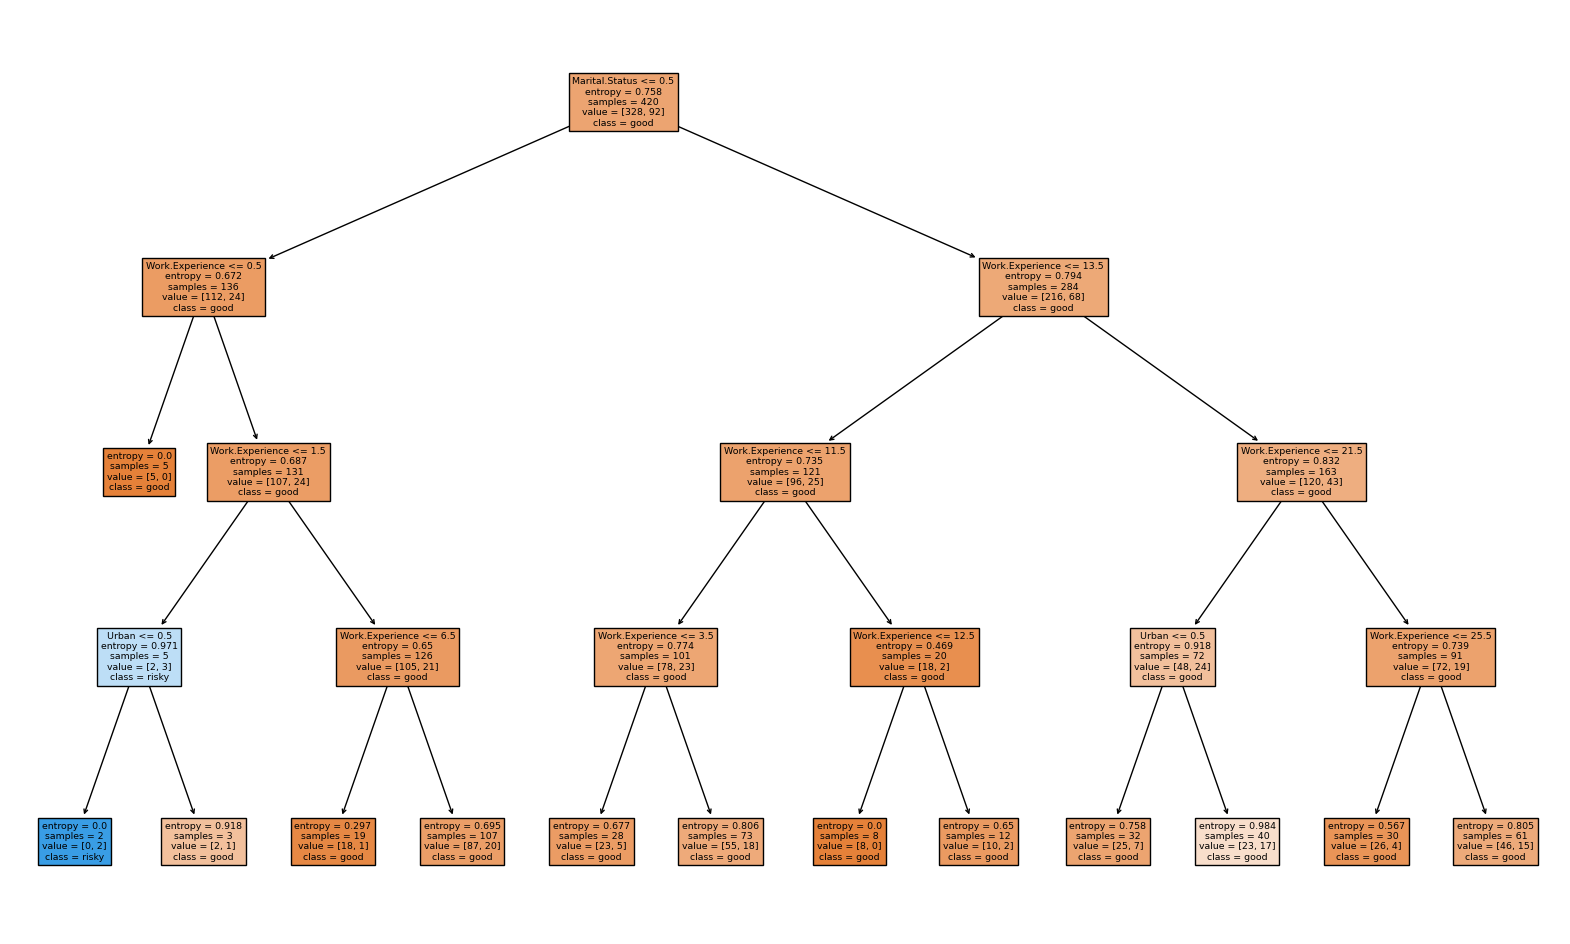

In [37]:
# plotting tree
plt.figure(figsize=(20,12))
from sklearn import tree
tree.plot_tree(model,feature_names=['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban'],class_names=['good','risky']
              ,filled=True)
plt.plot()

## decision tree model using gini criteria

In [42]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [43]:
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4)

In [44]:
ypred1=model1.predict(xtest)

In [45]:
# accuracy
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

        good       0.83      0.99      0.90       148
       risky       0.50      0.03      0.06        32

    accuracy                           0.82       180
   macro avg       0.66      0.51      0.48       180
weighted avg       0.77      0.82      0.75       180



[]

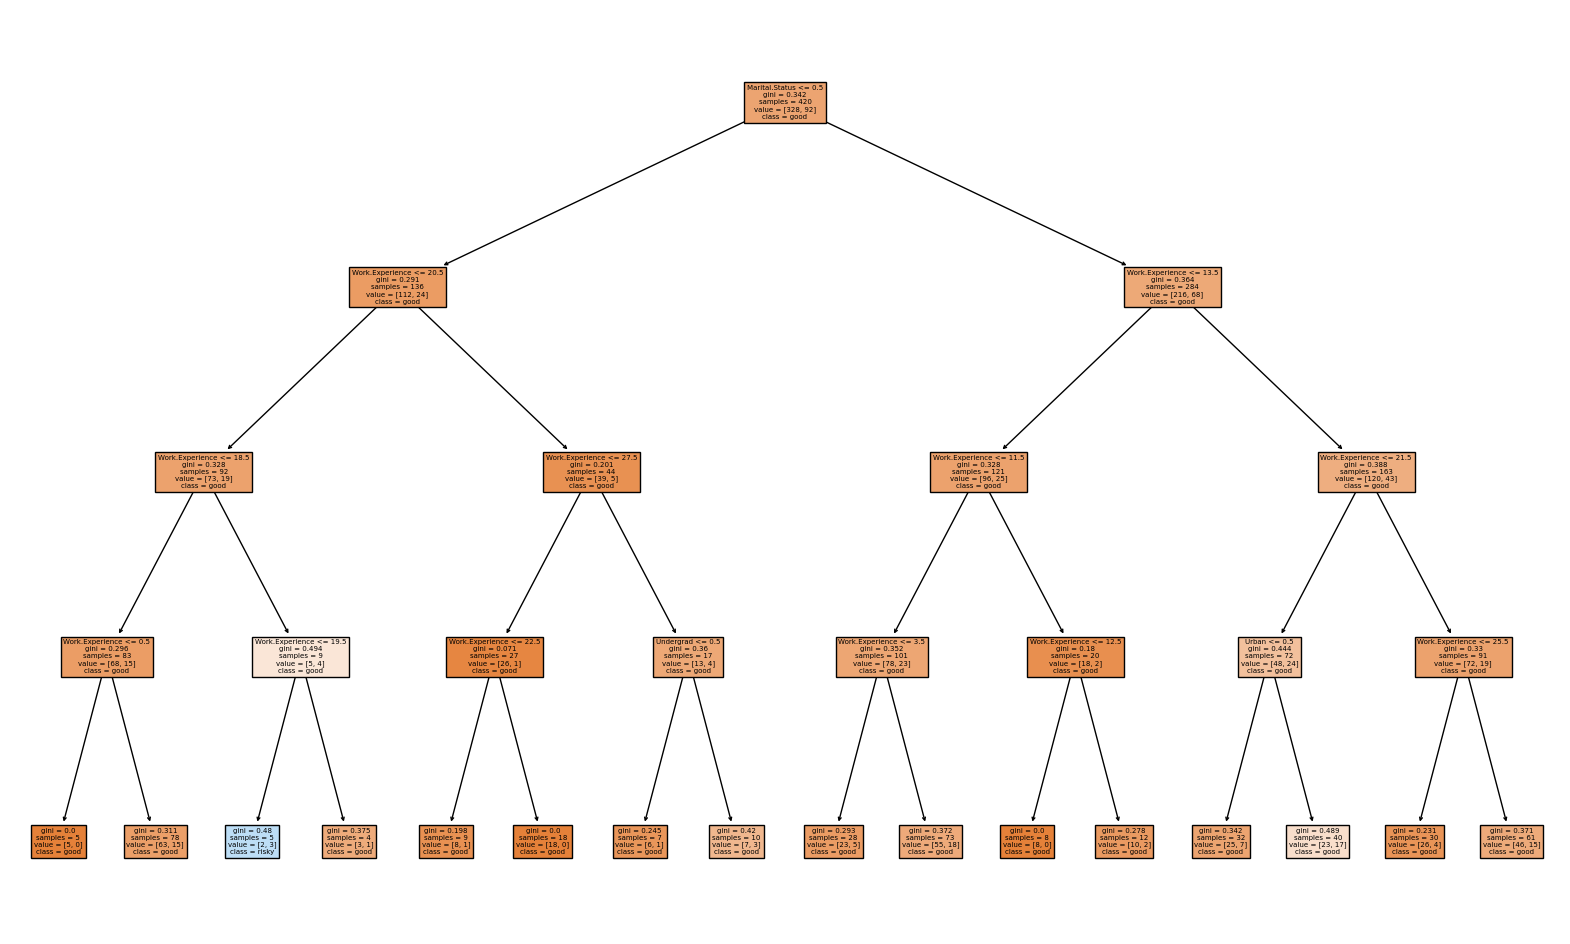

In [46]:
# plotting tree
plt.figure(figsize=(20,12))
from sklearn import tree
tree.plot_tree(model1,feature_names=['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban'],class_names=['good','risky']
              ,filled=True)
plt.plot()

In [47]:
# for improving accuracy try hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [49]:
params={
    'criterion':['entropy','gini'],
    'max_depth':[1,2,3,4,5,6],
    'splitter':['best','random']
}

In [51]:
gs=GridSearchCV(model,params)
gs.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [52]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'splitter': 'best'}

In [62]:
# building best model 
model2=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=1)

In [63]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [64]:
predict=model2.predict(xtest)

In [65]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

        good       0.82      1.00      0.90       148
       risky       0.00      0.00      0.00        32

    accuracy                           0.82       180
   macro avg       0.41      0.50      0.45       180
weighted avg       0.68      0.82      0.74       180



C:\Users\bivin\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bivin\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bivin\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
